# Color Deconvolution

In [1]:
import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 25, 7
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

#### Load input image

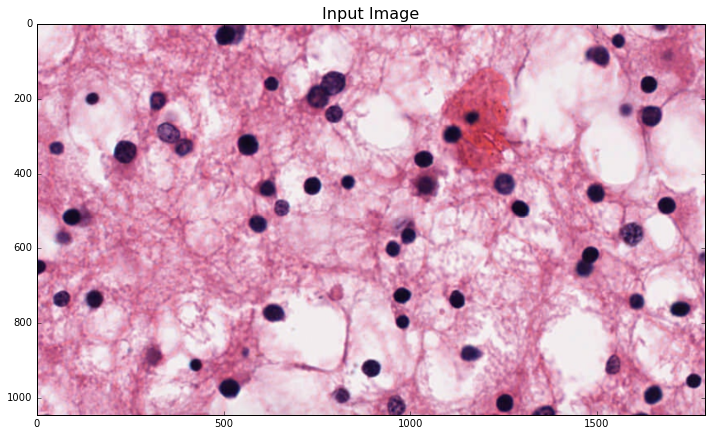

In [2]:
inputImageFile = 'https://data.kitware.com/api/v1/file/576ad39b8d777f1ecd6702f2/download'

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

#### Supervised color deconvolution with a known stain matrix

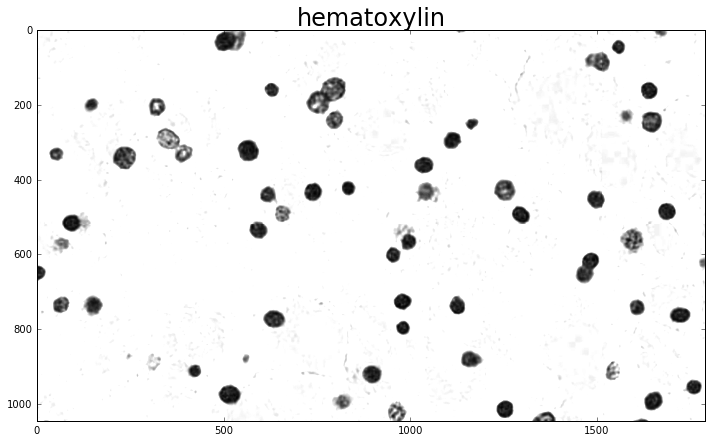

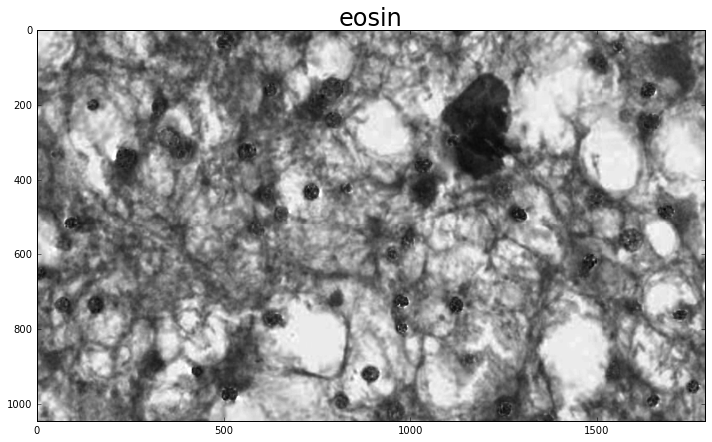

In [ ]:
# create stain to color map
stainColorMap = {
    'hematoxylin': [0.65, 0.70, 0.29],
    'eosin':       [0.07, 0.99, 0.11],
    'dab':         [0.27, 0.57, 0.78],
    'null':        [0.0, 0.0, 0.0]
}

# specify stains of input image
stain_1 = 'hematoxylin'   # nuclei stain
stain_2 = 'eosin'         # cytoplasm stain
stain_3 = 'null'          # set to null of input contains only two stains

# create stain matrix
W = np.array([stainColorMap[stain_1], 
              stainColorMap[stain_2], 
              stainColorMap[stain_3]]).T

# perform standard color deconvolution
imDeconvolved = htk.ColorDeconvolution(imInput, W)

# Display results
plt.figure()
plt.imshow(imDeconvolved.Stains[:, :, 0])
plt.title(stain_1, fontsize=titlesize)

plt.figure()
plt.imshow(imDeconvolved.Stains[:, :, 1])
_ = plt.title(stain_2, fontsize=titlesize)

#### Unsupervised color deconvolution using sparse non-negative matrix factorization

In [ ]:
# create initial stain matrix
W_init = np.array([stainColorMap[stain_1], 
                   stainColorMap[stain_2]]).T

# perform sparse color deconvolution
sparsity_factor = 0.5

imDeconvolved, W_est = htk.SparseColorDeconvolution(imInput, W_init, sparsity_factor)

print 'Estimated stain colors (in columns): '

print W_est

# Display results
plt.figure()
plt.imshow(imDeconvolved[:, :, 0])
plt.title(stain_1, fontsize=titlesize)

plt.figure()
plt.imshow(imDeconvolved[:, :, 1])
_ = plt.title(stain_2, fontsize=titlesize)